In [1]:
#Q.No.1>  Implement a basic convolution operation using a filter and a 5x5 image (matrix).
import numpy as np

# Step 1: Define the Image (5x5 matrix)
image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

# Step 2: Define the Filter (3x3 kernel)
filter_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

# Step 3: Apply the convolution operation
# Create an output matrix for storing results
output = np.zeros((image.shape[0] - filter_kernel.shape[0] + 1, image.shape[1] - filter_kernel.shape[1] + 1))

# Convolution operation: slide the filter over the image
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        # Extract the region of interest (ROI)
        region = image[i:i+filter_kernel.shape[0], j:j+filter_kernel.shape[1]]
        # Perform element-wise multiplication and sum the result
        output[i, j] = np.sum(region * filter_kernel)

# Step 4: Display the result
print("Convolved Image (Feature Map):")
print(output)


Convolved Image (Feature Map):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
#Q.No.2> Implement max pooling on a 4x4 feature map with a 2x2 window.
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential

# Parameters
num_samples = 1000  # Number of samples in the dataset
image_size = 28  # Image dimensions (28x28)
num_classes = 10  # Number of classes (can be adjusted)
batch_size = 64
epochs = 5

# 1. Generate a synthetic dataset 
X_train = np.random.rand(num_samples, image_size, image_size, 1)
y_train = np.random.randint(0, num_classes, num_samples)  # Random integer labels between 0 and num_classes-1

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(image_size,image_size,1)),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)

In [ ]:
#Q.No.3> Implement the ReLU activation function on a feature map?
import numpy as np

# Sample feature map (2D array)
feature_map = np.array([[1, -2, 3],
                        [-1, 2, -3],
                        [4, -5, 6]])

# Applying ReLU activation function element-wise
relu_feature_map = np.maximum(0, feature_map)

print(relu_feature_map)


[[1 0 3]
 [0 2 0]
 [4 0 6]]


In [8]:
#Q.No.4>  Create a simple CNN model with one convolutional layer and a fully connected layer, using random data?
import torch
import torch.nn as nn
import torch.optim as optim

# Define the CNN class
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Convolutional Layer (1 input channel, 1 output channel, kernel size 3x3)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
        
        # Fully Connected Layer (input size 26*26 after 3x3 convolution, output size 10)
        self.fc1 = nn.Linear(1 * 26 * 26, 10)  # Flattened size after convolution
        
    def forward(self, x):
        # Pass through convolutional layer, then ReLU activation
        x = self.conv1(x)
        x = torch.relu(x)
        
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)  # Flattening
        
        # Pass through the fully connected layer
        x = self.fc1(x)
        return x

# Instantiate the model
model = SimpleCNN()

# Generate random data (batch size 4, 1 channel, 28x28 images)
random_data = torch.randn(4, 1, 28, 28)  # Random data with shape (batch_size, channels, height, width)

# Forward pass through the model
output = model(random_data)
print(output)

tensor([[ 0.3232,  0.0120,  0.2898,  0.0912,  0.1548,  0.1902, -0.1297, -0.0672,
         -0.0352, -0.1783],
        [-0.1687, -0.0269,  0.1625, -0.0780, -0.0023,  0.1398, -0.0156, -0.0182,
          0.0621, -0.0563],
        [ 0.2263,  0.0401,  0.0088,  0.2593, -0.0492,  0.1218, -0.1097,  0.0723,
         -0.0978,  0.2580],
        [ 0.1655,  0.1296,  0.1769, -0.0785,  0.1476,  0.0290, -0.0416, -0.0004,
          0.0889, -0.0715]], grad_fn=<AddmmBackward0>)


In [9]:
#Q.No.5>  Generate a synthetic dataset using random noise and train a simple CNN model on it.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Step 1: Create a synthetic dataset with random noise and labels
class RandomNoiseDataset(Dataset):
    def __init__(self, num_samples, image_size=(1, 28, 28), num_classes=10):
        self.num_samples = num_samples
        self.image_size = image_size
        self.num_classes = num_classes

        # Generate random images (noise) and random labels
        self.data = torch.randn(num_samples, *image_size)  # Random noise
        self.labels = torch.randint(0, num_classes, (num_samples,))  # Random labels

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Step 2: Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)  # 1 input channel, 8 output channels
        self.fc1 = nn.Linear(8 * 26 * 26, 10)  # Flattening output from convolution to 10 outputs for classification

    def forward(self, x):
        x = self.conv1(x)  # Apply convolution
        x = torch.relu(x)  # ReLU activation
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc1(x)  # Fully connected layer
        return x

# Step 3: Set up dataset, model, loss, and optimizer
num_samples = 1000  # Number of random images
batch_size = 32  # Size of mini-batches
num_epochs = 5  # Number of training epochs

# Create the dataset and data loader
dataset = RandomNoiseDataset(num_samples=num_samples)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the model
model = SimpleCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/5], Loss: 2.4901, Accuracy: 9.90%
Epoch [2/5], Loss: 1.8247, Accuracy: 41.80%
Epoch [3/5], Loss: 1.3234, Accuracy: 63.40%
Epoch [4/5], Loss: 0.8585, Accuracy: 85.00%
Epoch [5/5], Loss: 0.5367, Accuracy: 94.30%


In [ ]:
#Q.No.6>  Create a simple CNN using Keras with one convolution layer and a max-pooling layer
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential


model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15, 15, 10)     │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314 (1.23 KB)

 Trainable params: 314 (1.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Q.No.7>  Write a code to add a fully connected layer after the convolution and max-pooling layers in a CNN.
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential


model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │         4,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6, 6, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6, 6, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6, 6, 10)       │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,122 (86.41 KB)

 Trainable params: 22,122 (86.41 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
#Q.No.8>  Write a code to add  batch normalization to a simple CNN model
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential


model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='softmax'),
    BatchNormalization(),
    Dense(64,activation='softmax'),
    BatchNormalization(),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       230,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,426 (939.16 KB)

 Trainable params: 240,042 (937.66 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
#Q.No.9>  Write a code to add dropout regularization to a simple CNN model.
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential


model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='softmax'),
    Dropout(0.2),
    Dense(64,activation='softmax'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()






c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       230,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,658 (936.16 KB)

 Trainable params: 239,658 (936.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Q.No.10>  Write a code to print the architecture of the VGG16 model in Keras?
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_base.trainable = False


model = models.Sequential()


model.add(vgg16_base)
model.add(layers.Flatten())  
model.add(layers.Dense(256, activation='relu'))  
model.add(layers.Dropout(0.5))  
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 770s 13us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,472 (80.63 MB)

 Trainable params: 6,422,784 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3650 - loss: 1.7223 - val_accuracy: 0.5744 - val_loss: 1.2085
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5903 - loss: 1.1592 - val_accuracy: 0.6277 - val_loss: 1.0587
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6509 - loss: 0.9923 - val_accuracy: 0.6541 - val_loss: 0.9920
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6821 - loss: 0.9114 - val_accuracy: 0.6660 - val_loss: 0.9635
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7148 - loss: 0.8240 - val_accuracy: 0.6672 - val_loss: 0.9651
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7366 - loss: 0.7538 - val_accuracy: 0.6737 - val_loss: 0.9511
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7615 - loss: 0.6823 - val_accuracy: 0.6780 - val_loss: 0.9485
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7774 - loss: 0.6328 -

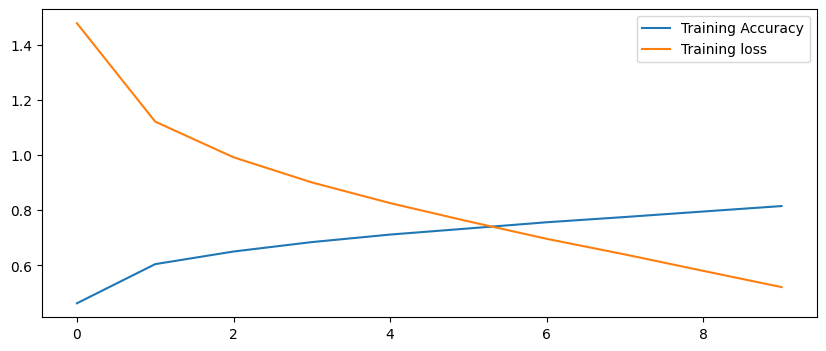

In [3]:
#Q.No.11>  Write a code to plot the accuracy and loss graphs after training a CNN model.
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

#plotting accuracy and loss during training
plt.figure(figsize=(10,4))

plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['loss'],label='Training loss')
plt.legend()
plt.show()


In [ ]:
#Q.No.12>  Write a code to print the architecture of the ResNet50 model in Keras?
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from keras.applications import ResNet50

base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
x=base_model.output
x1=GlobalAveragePooling2D()(x)
x2=Dense(1024,activation='relu')(x1)
prediction=Dense(10,activation='softmax')(x2)

model_feat=Model(inputs=base_model.input,outputs=prediction)

model_feat.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,472 (80.63 MB)

 Trainable params: 6,422,784 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#Q.No.13>  Write a code to train a basic CNN model and print the training loss and accuracy after each epoch?
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10


(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(x_train)
x_train=x_train/255.0
x_test=x_test/255.

model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

for epoch in range(10):
    print(f"Epoch {epoch+1}:")
    print(f"Training Loss: {history.history['loss'][epoch]:.4f}")
    print(f"Training Accuracy: {history.history['accuracy'][epoch]:.4f}")



(50000, 32, 32, 3)
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3419 - loss: 1.8586 - val_accuracy: 0.4870 - val_loss: 1.4526
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5097 - loss: 1.4091 - val_accuracy: 0.5244 - val_loss: 1.3605
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5432 - loss: 1.3175 - val_accuracy: 0.5390 - val_loss: 1.3152
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5648 - loss: 1.2620 - val_accuracy: 0.5449 - val_loss: 1.2895
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5799 - loss: 1.2181 - val_accuracy: 0.5556 - val_loss: 1.2610
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5883 - loss: 1.1878 - val_accuracy: 0.5647 - val_loss: 1.2368
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5950 - loss: 1.1695 - val_accuracy: 0.5538 - val_loss: 1.2556
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5979 - loss: 1.1500 - val_accuracy: 0.